## Dog and Cats kaggle data on local machine; (from Chollet 8.2)

- Using tf data API, 
- pretrained models, 
- data augmentation
- fine tuning pretrained

The first part of this exercise includes reading the data in batches from a file, so as not to load into memory. Though you wont want to be loading large data sets onto a personal machine, I recommend trying loading the Dogs and Cats Kaggle data on both Colab and a personal machine as an exercise.  This example uses a small data set to illustrate how that works, and also illustrates the `data` API that can be used to handle data pipelines.

### NOTE!
The first part of this is acquiring and downloading the data, and creating directories. You can skip this and use the data files on the google drive here. https://drive.google.com/drive/folders/1c1XKCClFnP9TiBMI8jMpHa_hN2iplyUl?usp=drive_link
You will need to put the top cats vs dogs folder in your local notebook directory.

### Install the kaggle library. The % works like ! for terminal commands but allows use without restarting.

In [1]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


The following creates a hidden folder and copies the kaggle json that you got from kaggle (See Chollet 8.2.2) You need to make sure the file is in the ~/ home directory, or replace the 

`!cp kaggle.json ~/.kaggle/`

with 

`!cp path_to_your_directory/kaggle.json ~/.kaggle/`

Also note that you can of course open a terminal and execute these commands without the !. You might as well get comfortable using Unix commands in the terminal. It makes life easier in the long run.

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: /Users/marciero/.kaggle: File exists
cp: kaggle.json: No such file or directory


Note this creates a hidden directory and file. Thats the . prepending. You can list with terminal command to see if it appears. You need to make sure the file is in the correct directory or you will get a "No such file or directory". Again these commands can be executed in the terminal.



In [19]:
!ls -a ~/

.                          .oracle_jre_usage
..                         .positron
.Box_EngineServer          .putty
.Box_UIServer              .python_history
.CFUserTextEncoding        .sh_history
.DS_Store                  .ssh
.Rapp.history              .tcshrc
.Renviron                  .viminfo
.Rhistory                  .vscode
.Trash                     .vscode-R
.anaconda                  .xonshrc
.bash_history              .zsh_history
.bash_profile              .zsh_sessions
.bash_sessions             .zshrc
.cache                     Applications
.cmdstan                   Desktop
.conda                     Documents
.condarc                   Downloads
.config                    Dropbox
.continue                  Library
.continuum                 Maple
.cups                      Miniforge3-MacOSX-arm64.sh
.dropbox                   Movies
.dropbox_bi                Music
.duckdb                    Pictures
.flexlmrc                  Public
.gitconfig                 Rpacka

The following will download to your current directory. You can find out with `pwd`. In fact that may work without the !. 

In [13]:
!kaggle competitions download -c dogs-vs-cats 

 56%|██████████████████████▎                 | 452M/812M [00:35<00:32, 11.5MB/s]^C


You can follow along with the text for the following

In [12]:
!unzip -qq dogs-vs-cats.zip

In [10]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

You can see the directories being created in your folder when you execute the following. The `fnames` command is a list comprehension using formatted string to create names for the image files. You have probably seen and used both list comprehensions and formatted strings in other contexts. You can see the methods from the imported libraries. It is easy to see what they are doing. We do not focus on data management in this course, but the code below might form a template for what you might use in a given situation, depending on the requirements.

One thing to note is that the `image_dataset_from_directory` method used below to create the tf.data.Datesets objects that are read in and processed by the model does assume that the file structure is of the form below; in particular with separate directories for the classes; in this case dogs and cats.

In [1]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)



In [ ]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

#### Colab

If you are doing this in Colab, as an option you can mount your drive create a folder in your drive and load the data there. That way you dont have to go through all the steps for downloading the data from kaggle and creating the subfolders if you revisit this example, or if your Colab session times out. For example, assuming you have a folder named "Kaggle" on your MyDrive, 

`!kaggle competitions download -c dogs-vs-cats -p drive/MyDrive/Kaggle` 

would load the data into that folder. You would also have to change the directory paths in `original_dir` and `new_base_dir` above to match

### Building the model (Start here if you have the cats vs dogs data folders in a local directory)

**Instantiating a small convnet for dogs vs. cats classification**

This is the easy part. Below is functional API, which has advantages over the `Sequential` class. In this case either would be fine.

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Configuring the model for training**

In [7]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**. This is part of the `data` API. It creates `tf.data.Dataset` objects. The "from_directory" refers to the fact that when the model fits the data, the data is read in and processed in batches from the directories. This avoids loading the entire data set into memory. Though not necessary in this case, an approach such as this would be necessary for large data sets that do not fit into memory. 

Check out the documentation. https://keras.io/api/data_loading/#image-data-loading

**Remark:** `pathlib.Path` is not a TensorFlow package, it ia built-in Python standard library module for working with file system paths in a more object-oriented and cross-platform way.


In [10]:
import pathlib

original_dir = pathlib.Path("train") 
new_base_dir = pathlib.Path("cats_vs_dogs_small")

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Note that `None` is the first dimension as no data has been read in yet. See Chollet 8.2.4. "Understanding Tensorflow `Dataset` object".

In [11]:
train_dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

The following is just an example- not related to the cats and dogs.

In [12]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [13]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [14]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [15]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Try the above with the batched data set. Note that you have to include the batch size.

**Displaying the shapes of the data and labels yielded by the `Dataset`**

Below, the labels are inferred from the folder structure used by `image_dataset_from_directory`. Each subfolder is treated as a different class.

In [16]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

This will take a long time if you do not have a GPU. My Mac took over 13 minutes compared to about a minute on Colab with a GPU.

In [34]:
import time
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_01.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/30
63/63 [==============================] - 25s 395ms/step - loss: 0.6761 - accuracy: 0.5880 - val_loss: 0.6435 - val_accuracy: 0.6060
Epoch 2/30
63/63 [==============================] - 25s 392ms/step - loss: 0.6394 - accuracy: 0.6355 - val_loss: 0.7267 - val_accuracy: 0.5990
Epoch 3/30
63/63 [==============================] - 26s 407ms/step - loss: 0.6042 - accuracy: 0.6785 - val_loss: 0.5882 - val_accuracy: 0.6630
Epoch 4/30
63/63 [==============================] - 25s 391ms/step - loss: 0.5632 - accuracy: 0.7125 - val_loss: 0.5722 - val_accuracy: 0.6960
Epoch 5/30
63/63 [==============================] - 25s 391ms/step - loss: 0.5283 - accuracy: 0.7415 - val_loss: 0.5833 - val_accuracy: 0.6930
Epoch 6/30
63/63 [==============================] - 25s 395ms/step - loss: 0.4868 - accuracy: 0.7735 - val_loss: 0.5786 - val_accuracy: 0.7230
Epoch 7/30
63/63 [==============================] - 25s 396ms/step - loss: 0.4399 - accuracy: 0.7995 - val_loss: 0.5575 - val_accuracy: 0.7510

You can always save a model with `model.save()`. The thing about using callback is that it will save the best model. If you dont use callback it will just save the model with the weights as they exist; that is, with the latest model weights. You can then load models with `keras.models.load_model()`.

You can also save the training history using

```
import json

# Convert the history.history dict to a JSON file
with open('model_history.json', 'w') as f:
    json.dump(history.history, f)

```

In [39]:
covnet_01 = keras.models.load_model("convnet_01.keras")
type(covnet_01)
covnet_01.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Displaying curves of loss and accuracy during training**

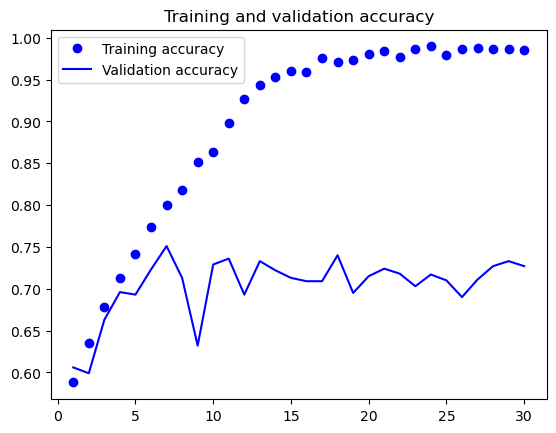

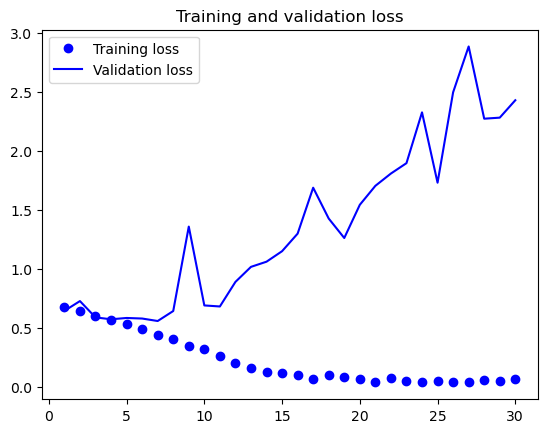

In [40]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

We load the best model from training.

In [3]:
test_model = keras.models.load_model("convnet_01.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2025-08-04 10:23:16.149499: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


63/63 [==============================] - 7s 109ms/step - loss: 0.5893 - accuracy: 0.7265
Test accuracy: 0.726


## Using data augmentation

**Define a data augmentation stage to add to an image model**

In [3]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [4]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

**Plotting the results**

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")